In [1]:
import sympy as sm

In [2]:
sm.init_printing()

In [72]:
mc, mb, Ib, Ic, l, r, g, t = sm.symbols('m_c, m_b, I_b, I_c, l, r, g, t', real=True, positive=True)

In [73]:
theta = sm.Function('theta')(t)
omega = sm.Function('omega')(t)

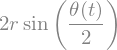

In [74]:
d = 2*r*sm.sin(theta/2)
d

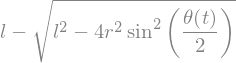

In [75]:
h = l - sm.sqrt(l**2 - d**2)
h

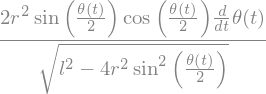

In [76]:
v = sm.diff(h, t)
v

In [77]:
v = v.subs({theta.diff(): omega})

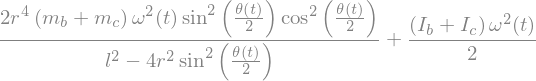

In [78]:
T = (mb + mc)*v**2/2 + (Ib + Ic)*omega**2/2
T

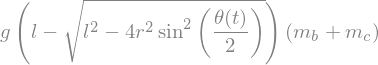

In [79]:
U = (mb + mc)*g*h
U

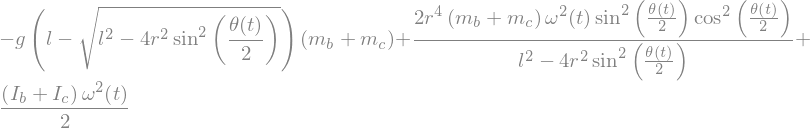

In [80]:
L = T - U  # check for no time derivatives!!
L

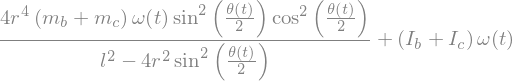

In [81]:
dLdomega = sm.diff(L, omega)
dLdomega

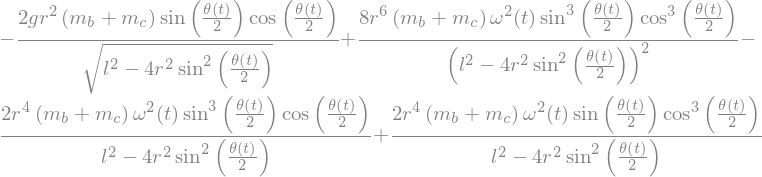

In [82]:
dLdtheta = sm.diff(L, theta)
dLdtheta

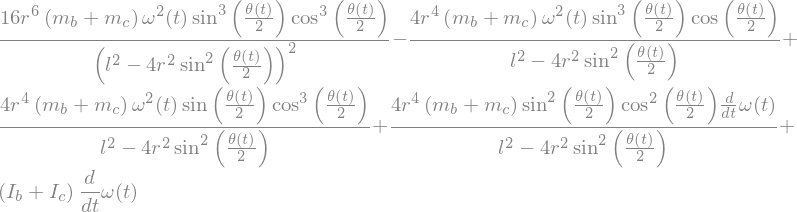

In [83]:
sm.diff(dLdomega, t).subs({theta.diff(): omega})

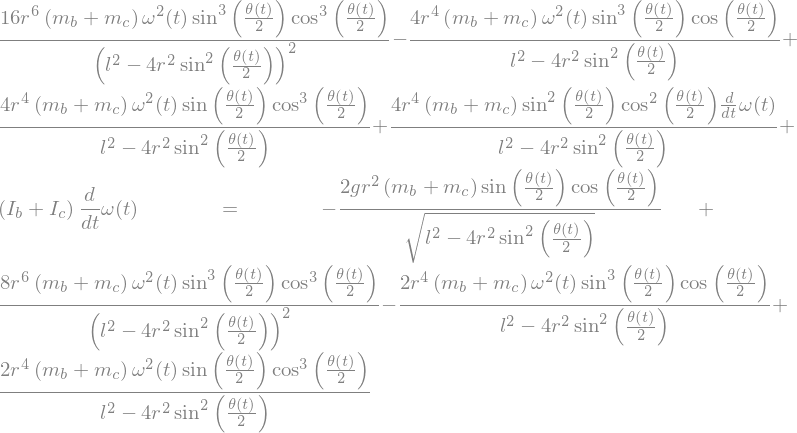

In [84]:
lag_eq = sm.Eq(sm.diff(dLdomega, t).subs({theta.diff(): omega}), dLdtheta)
lag_eq

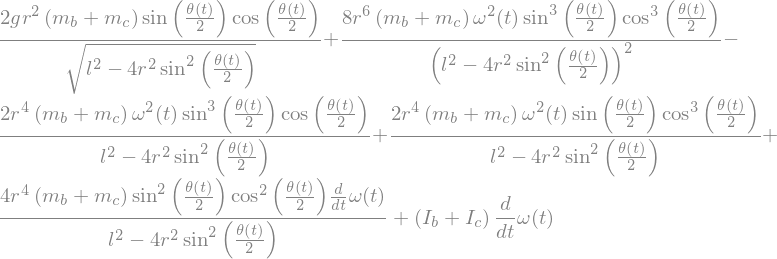

In [85]:
f = sm.diff(dLdomega, t).subs({theta.diff(): omega}) - dLdtheta
f

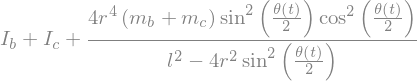

In [86]:
f.coeff(omega.diff())

In [87]:
#0 = f = I*omegadot + g

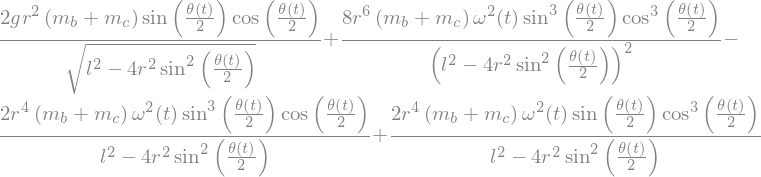

In [88]:
g = f.subs({omega.diff(): 0})
g

In [89]:
omegadot = -g / f.coeff(omega.diff())

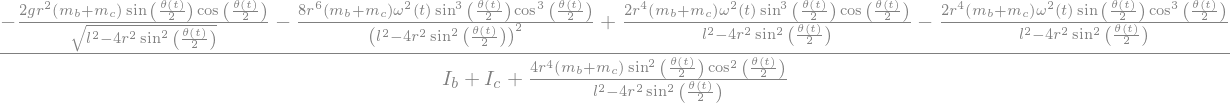

In [90]:
omegadot

In [91]:
str(omegadot).replace('(t)', '').replace('sin(', 'np.sin(').replace('cos(', 'np.cos(')

'(-2*g*r**2*(m_b + m_c)*np.sin(theta/2)*np.cos(theta/2)/sqrt(l**2 - 4*r**2*np.sin(theta/2)**2) - 8*r**6*(m_b + m_c)*omega**2*np.sin(theta/2)**3*np.cos(theta/2)**3/(l**2 - 4*r**2*np.sin(theta/2)**2)**2 + 2*r**4*(m_b + m_c)*omega**2*np.sin(theta/2)**3*np.cos(theta/2)/(l**2 - 4*r**2*np.sin(theta/2)**2) - 2*r**4*(m_b + m_c)*omega**2*np.sin(theta/2)*np.cos(theta/2)**3/(l**2 - 4*r**2*np.sin(theta/2)**2))/(I_b + I_c + 4*r**4*(m_b + m_c)*np.sin(theta/2)**2*np.cos(theta/2)**2/(l**2 - 4*r**2*np.sin(theta/2)**2))'

In [92]:
from resonance.nonlinear_systems import SingleDoFNonLinearSystem

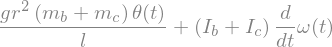

In [98]:
f.subs({
    sm.cos(theta/2): 1,
    sm.sin(theta/2): theta/2,
    theta**3: 0,
    theta**2: 0,
    omega**2: 0,
    
})